## Data

In [137]:
x = pd.read_csv('x.csv',header=0)
x = x.drop(['Unnamed: 0'],axis =1)
y = pd.read_csv('y.csv',header=0)
y = y.drop(['Unnamed: 0'],axis =1)

Model

In [185]:
def baseline_model(n1=69, n2 = 54,l = 0.00,n3 = 67,n_inputs = 45):
    baseline_model = Sequential()
    baseline_model.add(Dense(n1,input_dim=n_inputs,
                             kernel_initializer='normal',activation='relu', activity_regularizer=regularizers.l2(l)))
    baseline_model.add(Dense(n2,
                             kernel_initializer='normal',activation='relu',activity_regularizer=regularizers.l2(l)))
    baseline_model.add(Dense(n3,
                             kernel_initializer='normal',activation='relu',activity_regularizer=regularizers.l2(l)))
    baseline_model.add(Dense(1,kernel_initializer='normal'))
    baseline_model.compile(loss='mse',optimizer='Adam')
    return baseline_model

In [139]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers



train_x, test_x, train_y, test_y = train_test_split(x[:2000], y[:2000],random_state = 2,test_size=0.3)
poly = PolynomialFeatures(2)
ypoly = train_y
xpoly = poly.fit_transform(train_x)
model = baseline_model(n_inputs=poly.n_output_features_)
history = model.fit(xpoly,ypoly,epochs=100,batch_size=10,validation_split= 0.3)


# estimator = KerasRegressor(build_fn=baseline_model,epochs=100, batch_size =5,verbose =0)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, x, y, cv=kfold)
# print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Train on 979 samples, validate on 421 samples
Epoch 1/100
979/979 [==============================] - 0s 231us/step - loss: 92424321.1011 - val_loss: 105068849.1306
Epoch 2/100
979/979 [==============================] - 0s 117us/step - loss: 49522586.3187 - val_loss: 28192644.8504
Epoch 3/100
979/979 [==============================] - 0s 111us/step - loss: 16365059.1216 - val_loss: 22277070.1841
Epoch 4/100
979/979 [==============================] - 0s 124us/step - loss: 13016976.6443 - val_loss: 20811990.0784
Epoch 5/100
979/979 [==============================] - 0s 133us/step - loss: 11578838.3823 - val_loss: 18819384.4216
Epoch 6/100
979/979 [==============================] - 0s 110us/step - loss: 10561229.1200 - val_loss: 16711064.2821
Epoch 7/100
979/979 [==============================] - 0s 113us/step - loss: 10092447.6236 - val_loss: 16227148.3628
Epoch 8/100
979/979 [==============================] - 0s 103us/step - loss: 9690420.4558 - val_loss: 16572332.9656
Epoch 9/100
979/97

KeyboardInterrupt: 

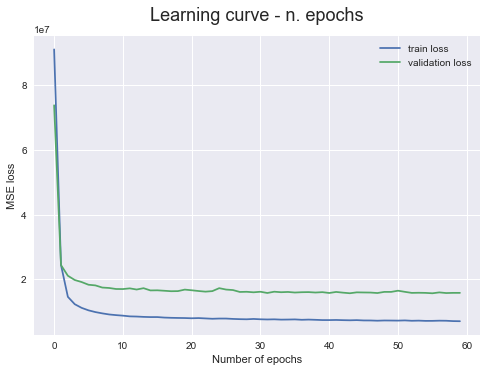

In [162]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.ylabel('MSE loss')
plt.xlabel('Number of epochs')
plt.title('Learning curve - n. epochs', fontsize = 18, y = 1.03)
plt.legend()
plt.savefig('NN_learning curve.png')
plt.show()


Lambda

In [136]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV



degrees = range(12,72,5)
l = [0,0.001,0.01,0.1,1,10,100]

train_x, test_x, train_y, test_y = train_test_split(x[:2000], y[:2000],random_state = 2,test_size=0.3)
poly = PolynomialFeatures(2)
ypoly = train_y
xpoly = poly.fit_transform(train_x)
model = baseline_model()

regressor = KerasRegressor(build_fn=baseline_model, epochs=60, batch_size=10, verbose=0)
param_grid = dict(l=l, n_inputs=[poly.n_output_features_])
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, n_jobs=-1, return_train_score=True,scoring='neg_mean_squared_error')
grid_result = grid.fit(xpoly, ypoly)



In [141]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10039983.144187 using {'l': 0.01, 'n_inputs': 45}
-10128189.330399 (3197524.040023) with: {'l': 0, 'n_inputs': 45}
-10097262.691251 (3255562.657195) with: {'l': 0.001, 'n_inputs': 45}
-10039983.144187 (3010096.302967) with: {'l': 0.01, 'n_inputs': 45}
-10379378.205664 (3589252.377691) with: {'l': 0.1, 'n_inputs': 45}
-10639781.286004 (3585776.024402) with: {'l': 1, 'n_inputs': 45}
-13419919.230873 (5644597.569635) with: {'l': 10, 'n_inputs': 45}
-25294249.226508 (6583530.520611) with: {'l': 100, 'n_inputs': 45}


ValueError: x and y must have same first dimension, but have shapes (7,) and (12,)

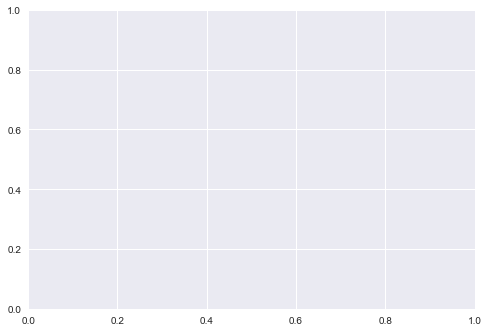

In [171]:
grid_result.cv_results_.keys()

plt.plot(l,grid_result.cv_results_['mean_test_score'],'r',label = 'mean_test_score')
plt.plot(l,grid_result.cv_results_['mean_train_score'],label = 'mean_train_score')
plt.xlabel('lambda')
plt.legend()
plt.ylabel('Negative mean square error score')

plt.title('Validation curve - lambda', fontsize = 18, y = 1.03)
plt.savefig('lambda.png')
plt.show()



Prediction

In [188]:
from sklearn.preprocessing import PolynomialFeatures
train_x, test_x, train_y, test_y = train_test_split(x[:3000], y[:3000],random_state = 2,test_size=0.3)
poly = PolynomialFeatures(2)
ypoly = train_y

xpoly = poly.fit_transform(train_x)
model = baseline_model(n_inputs=poly.n_output_features_)
history = model.fit(xpoly,ypoly,epochs=60,batch_size=10,validation_split= 0.33)
x_test_poly =poly.transform(test_x)
yPredict = model.predict(x_test_poly)


Train on 1406 samples, validate on 694 samples
Epoch 1/60
1406/1406 [==============================] - 0s 208us/step - loss: 89439955.5455 - val_loss: 68874310.8156
Epoch 2/60
1406/1406 [==============================] - 0s 117us/step - loss: 22750804.8851 - val_loss: 22449898.6823
Epoch 3/60
1406/1406 [==============================] - 0s 115us/step - loss: 12920639.2468 - val_loss: 19384316.2522
Epoch 4/60
1406/1406 [==============================] - 0s 114us/step - loss: 10959525.4463 - val_loss: 18358790.9362
Epoch 5/60
1406/1406 [==============================] - 0s 117us/step - loss: 9807369.8544 - val_loss: 17631032.2032
Epoch 6/60
1406/1406 [==============================] - 0s 108us/step - loss: 9154583.9051 - val_loss: 16784759.7572
Epoch 7/60
1406/1406 [==============================] - 0s 115us/step - loss: 8709375.5716 - val_loss: 16449847.1084
Epoch 8/60
1406/1406 [==============================] - 0s 109us/step - loss: 8429291.2805 - val_loss: 16122061.6128
Epoch 9/60
14

In [194]:
prediction = test_y.copy()
prediction['pricePredicted'] =yPredict
prediction['difference'] =abs(test_y-yPredict)
len(yPredict)

900

In [213]:
big_difference = prediction[prediction.difference >mean_absolute_error(test_y,yPredict)]
okey = prediction[prediction.difference <mean_absolute_error(test_y,yPredict)]
ranges = range(0,50000,2000)
distribution=prediction.groupby(pd.cut(prediction.difference,ranges)).count()
mistake_distribution =big_difference.groupby(pd.cut(big_difference.difference,ranges)).count()
mean = mistake_distribution/distribution
mean

o

,price,pricePredicted,difference
difference,,,
"(0, 2000]",0.10219,0.10219,0.10219
"(2000, 4000]",1.00000,1.00000,1.00000
"(4000, 6000]",1.00000,1.00000,1.00000
"(6000, 8000]",1.00000,1.00000,1.00000
"(8000, 10000]",1.00000,1.00000,1.00000
"(10000, 12000]",1.00000,1.00000,1.00000
"(12000, 14000]",NaN,NaN,NaN
"(14000, 16000]",1.00000,1.00000,1.00000
"(16000, 18000]",1.00000,1.00000,1.00000


In [214]:
prediction['difference'].median()
okey['difference'].median()

567.3302001953125

In [190]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean absolute error: {}".format(mean_absolute_error(test_y,yPredict)))
print("Mean squared error: {}".format(mean_squared_error(test_y,yPredict)))



Mean absolute error: 1639.8173125542535
Mean squared error: 8610900.096666219


Prumerna odchylka n1=69, n2 = 54, l= 0
2473.144519373576
Prumerna odchylka n1=69, n2 = 54, n3 = 67, l= 0
1909.79590037028
Prumerna odchylka n1=69, n2 = 54, n3 = 67, l= 0
Mean absolute error: 1776.0763856506348
Mean squared error: 9327109.395618744

In [ ]:
grid_results.cv_results_.key()

In [92]:
from sklearn.preprocessing import PolynomialFeatures
ypoly = y[:1000]
loss = []
val_loss = []
for i in range(1,7):
    poly = PolynomialFeatures(i)
    xpoly = poly.fit_transform(x[:1000])
    model = baseline_model(n_inputs=poly.n_output_features_)
    history = model.fit(xpoly,ypoly,epochs=60,batch_size=10,validation_split= 0.33)
    loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])
    

Train on 669 samples, validate on 331 samples
Epoch 1/60
669/669 [==============================] - 0s 249us/step - loss: 99984813.8744 - val_loss: 103203279.2900
Epoch 2/60
669/669 [==============================] - 0s 109us/step - loss: 99976618.5157 - val_loss: 103179920.1949
Epoch 3/60
669/669 [==============================] - 0s 94us/step - loss: 99909578.0149 - val_loss: 103036022.8059
Epoch 4/60
669/669 [==============================] - 0s 99us/step - loss: 99628662.5426 - val_loss: 102535603.2674
Epoch 5/60
669/669 [==============================] - 0s 97us/step - loss: 98857363.3931 - val_loss: 101385466.7228
Epoch 6/60
669/669 [==============================] - 0s 108us/step - loss: 97305881.1629 - val_loss: 99185165.4063
Epoch 7/60
669/669 [==============================] - 0s 99us/step - loss: 94611140.0030 - val_loss: 95679266.1495
Epoch 8/60
669/669 [==============================] - 0s 98us/step - loss: 90501859.6532 - val_loss: 90428487.8505
Epoch 9/60
669/669 [======

669/669 [==============================] - 0s 110us/step - loss: 13272872.5247 - val_loss: 14356947.4169
Epoch 11/60
669/669 [==============================] - 0s 107us/step - loss: 12836681.9105 - val_loss: 14079547.2964
Epoch 12/60
669/669 [==============================] - 0s 113us/step - loss: 12421597.0480 - val_loss: 13839381.4031
Epoch 13/60
669/669 [==============================] - 0s 100us/step - loss: 12081513.7578 - val_loss: 13745805.3006
Epoch 14/60
669/669 [==============================] - 0s 98us/step - loss: 11727472.5987 - val_loss: 13649408.5306
Epoch 15/60
669/669 [==============================] - 0s 100us/step - loss: 11357483.3737 - val_loss: 13210794.1542
Epoch 16/60
669/669 [==============================] - 0s 118us/step - loss: 11159673.4043 - val_loss: 13044185.8922
Epoch 17/60
669/669 [==============================] - 0s 105us/step - loss: 10953793.0523 - val_loss: 12892219.9568
Epoch 18/60
669/669 [==============================] - 0s 102us/step - loss: 

669/669 [==============================] - 0s 180us/step - loss: 6617923.4027 - val_loss: 14300221.4682
Epoch 21/60
669/669 [==============================] - 0s 136us/step - loss: 6252509.0009 - val_loss: 14253161.3884
Epoch 22/60
669/669 [==============================] - 0s 129us/step - loss: 6763679.7861 - val_loss: 15714986.7260
Epoch 23/60
669/669 [==============================] - 0s 132us/step - loss: 6205417.1005 - val_loss: 14995172.7324
Epoch 24/60
669/669 [==============================] - 0s 141us/step - loss: 6191370.1481 - val_loss: 14924114.0858
Epoch 25/60
669/669 [==============================] - 0s 141us/step - loss: 6026827.3507 - val_loss: 16778276.0750
Epoch 26/60
669/669 [==============================] - 0s 148us/step - loss: 5737926.2182 - val_loss: 16316843.5990
Epoch 27/60
669/669 [==============================] - 0s 156us/step - loss: 5892146.0211 - val_loss: 17690180.9971
Epoch 28/60
669/669 [==============================] - 0s 163us/step - loss: 5665230

669/669 [==============================] - 0s 523us/step - loss: 3201386.7535 - val_loss: 18952709.6527
Epoch 31/60
669/669 [==============================] - 0s 507us/step - loss: 3427813.7990 - val_loss: 22582691.2648
Epoch 32/60
669/669 [==============================] - 0s 505us/step - loss: 3035408.9360 - val_loss: 17763724.1528
Epoch 33/60
669/669 [==============================] - 0s 525us/step - loss: 2442260.2405 - val_loss: 23910211.2783
Epoch 34/60
669/669 [==============================] - 0s 510us/step - loss: 2835009.5278 - val_loss: 19796355.8905
Epoch 35/60
669/669 [==============================] - 0s 507us/step - loss: 3706280.5095 - val_loss: 20115167.3707
Epoch 36/60
669/669 [==============================] - 0s 510us/step - loss: 2916520.7209 - val_loss: 20614797.6424
Epoch 37/60
669/669 [==============================] - 0s 511us/step - loss: 2899601.4632 - val_loss: 21222922.4436
Epoch 38/60
669/669 [==============================] - 0s 513us/step - loss: 2137937

669/669 [==============================] - 4s 6ms/step - loss: 4251508.2047 - val_loss: 16806670.8610
Epoch 42/60
669/669 [==============================] - 4s 6ms/step - loss: 2680251.5685 - val_loss: 14779999.1846
Epoch 43/60
669/669 [==============================] - 4s 6ms/step - loss: 2655472.2422 - val_loss: 18394628.6196
Epoch 44/60
669/669 [==============================] - 4s 6ms/step - loss: 3141606.7520 - val_loss: 18285014.6380
Epoch 45/60
669/669 [==============================] - 4s 6ms/step - loss: 3001364.9292 - val_loss: 15726385.5172
Epoch 46/60
669/669 [==============================] - 4s 6ms/step - loss: 1970191.4443 - val_loss: 19677846.0263
Epoch 47/60
669/669 [==============================] - 4s 6ms/step - loss: 2271672.0482 - val_loss: 15825479.4758
Epoch 48/60
669/669 [==============================] - 4s 6ms/step - loss: 1946582.0205 - val_loss: 19304726.3361
Epoch 49/60
669/669 [==============================] - 4s 6ms/step - loss: 1785445.1177 - val_loss: 

669/669 [==============================] - 19s 28ms/step - loss: 2654228.3017 - val_loss: 83444510.5240
Epoch 52/60
669/669 [==============================] - 18s 27ms/step - loss: 2133234.6359 - val_loss: 90666175.6640
Epoch 53/60
669/669 [==============================] - 18s 27ms/step - loss: 1571212.2932 - val_loss: 68693128.3012
Epoch 54/60
669/669 [==============================] - 18s 28ms/step - loss: 1577529.9496 - val_loss: 84179718.9708
Epoch 55/60
669/669 [==============================] - 19s 29ms/step - loss: 1201998.0373 - val_loss: 73731637.0268
Epoch 56/60
669/669 [==============================] - 18s 27ms/step - loss: 1361473.8274 - val_loss: 90553733.2690
Epoch 57/60
669/669 [==============================] - 18s 27ms/step - loss: 1740810.6304 - val_loss: 138081514.5270
Epoch 58/60
669/669 [==============================] - 18s 27ms/step - loss: 1712633.8722 - val_loss: 95820843.5897
Epoch 59/60
669/669 [==============================] - 18s 27ms/step - loss: 212561

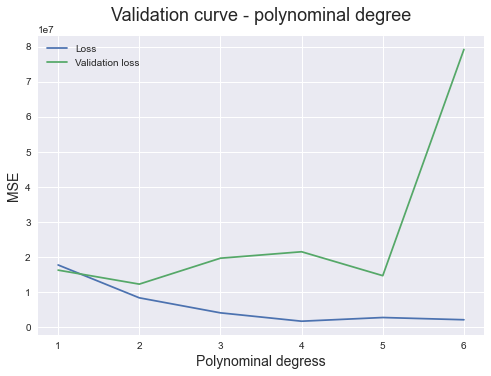

In [187]:
plt.plot(range(1,7),loss,label='Loss')
plt.plot(range(1,7),val_loss,label= 'Validation loss')
plt.legend()
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Polynominal degress', fontsize = 14)
plt.title('Validation curve - polynominal degree', fontsize = 18, y = 1.03)
plt.legend()
plt.show
plt.savefig('polynominal_degree.png')

In [152]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

train_sizes = [1, 100, 500, 2000, 5000, 7654]
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)
regressor = KerasRegressor(build_fn=baseline_model, epochs=60, batch_size=10, verbose=0)
poly = PolynomialFeatures(2)
ypoly = train_y
xpoly = poly.fit_transform(train_x)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = regressor,
X = xpoly,
y = ypoly, 
train_sizes = train_sizes, 
cv = 5,
scoring = 'neg_mean_squared_error')



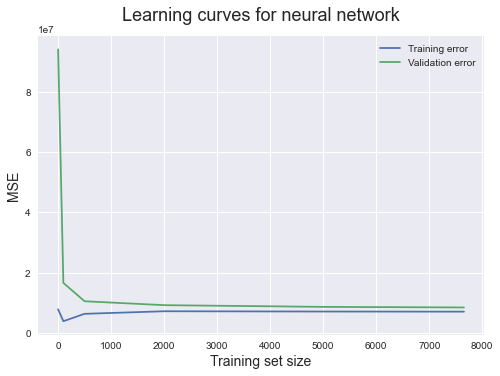

In [153]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for neural network', fontsize = 18, y = 1.03)
plt.legend()
plt.savefig('learning_curve.png')

Number of neurons

In [174]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV



degrees = range(12,72,5)
l = [0,0.001,0.01,0.1,1,10,100]

train_x, test_x, train_y, test_y = train_test_split(x[:1000], y[:1000],random_state = 2,test_size=0.3)
poly = PolynomialFeatures(2)
ypoly = train_y
xpoly = poly.fit_transform(train_x)
model = baseline_model()

regressor = KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=10, verbose=0)
param_grid = dict(n3=degrees)
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, n_jobs=-1, return_train_score=True,scoring='neg_mean_squared_error')
grid_result = grid.fit(xpoly, ypoly)


In [175]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -13211424.279095 using {'n3': 62}
-15061159.758564 (7354592.649866) with: {'n3': 12}
-14147315.327550 (6290610.697905) with: {'n3': 17}
-14014585.356927 (6200081.395756) with: {'n3': 22}
-13728639.161823 (6200031.223490) with: {'n3': 27}
-13856331.787827 (6233333.030481) with: {'n3': 32}
-13579083.693823 (5899675.292994) with: {'n3': 37}
-13541547.478312 (5911473.392110) with: {'n3': 42}
-13376892.511527 (5728825.561317) with: {'n3': 47}
-13275410.010091 (5565786.828462) with: {'n3': 52}
-13304888.775099 (5727583.513491) with: {'n3': 57}
-13211424.279095 (5634740.978879) with: {'n3': 62}
-13248909.396875 (5607098.896064) with: {'n3': 67}


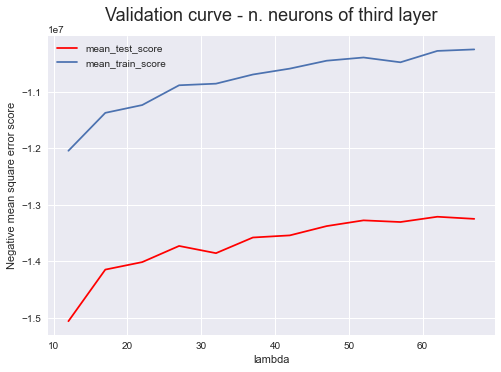

In [177]:
grid_result.cv_results_.keys()

plt.plot(degrees,grid_result.cv_results_['mean_test_score'],'r',label = 'mean_test_score')
plt.plot(degrees,grid_result.cv_results_['mean_train_score'],label = 'mean_train_score')
plt.xlabel('lambda')
plt.legend()
plt.ylabel('Negative mean square error score')

plt.title('Validation curve - n. neurons of third layer', fontsize = 18, y = 1.03)
plt.savefig('n3.png')
plt.show()